台灣金融控股 ready!!!


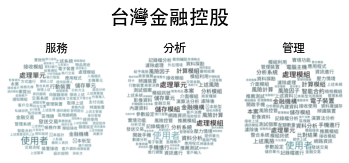

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import ast 
import random
plt.rcParams['font.sans-serif'] = ['Heiti TC']
def load(target):
    # fileName="新光金控"
    # filename="./_target/"+fileName+"reslut.xls"
    filename="./_target/"+target+"_reslut.xls"
    file = pd.read_excel(filename)
    print(target+" ready!!!")

    # print(file.head())
    return file

# def grey_color_func(word, font_size, position, orientation, random_state=None,
#                     **kwargs):
#     return "hsl(0, 0%%, %d%%)" % random.randint(10, 50)#(360 * wc[word])
def my_tf_color_func(dictionary):
  def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
    # print(abs(50-5*dictionary[word]))
    return "hsl(190, 30%%, %d%%)" % abs(50-5*dictionary[word])
  return my_tf_color_func_inner

x, y = np.ogrid[:1280, :1280]
mask = (x - 640) ** 2 + (y - 640) ** 2 >720**2
mask = 255 * mask.astype(int)

for i in ["中信金控","兆豐金控","台新金控","台灣金融控股","國泰金控","第一金控","玉山金控","富邦金控","新光金控"]:
# for i in["台灣金融控股"]:
    file=load(i)

    name=[]
    weight=[]

    fig, axs = plt.subplots(1, 3)    
    for prop ,k in zip(["服務","分析","管理"],range(0,3)):
      for j in file[prop]:
          text=ast.literal_eval(j)
          # text[0]=text[0].decode('gb2312')
          name.append(text[0])
          weight.append(text[1])
      dic = dict(zip(name, weight))
      wordcloud = WordCloud(max_font_size=120,min_font_size=30,prefer_horizontal=1,font_path="SourceHanSansTW-Regular.otf",margin=10,mask=mask,background_color="white" ).generate_from_frequencies(dic)

      # for word,weight in zip(file["服務"][0],file["服務"][1]):
      #     print(word)
      #     print(weight)
      # # Generate a word cloud image
      #width=1280,height=800,max_font_size=100,min_font_size=30
  
      axs[k].imshow(wordcloud.recolor(color_func=my_tf_color_func(dic), random_state=3), interpolation='bilinear')
      axs[k].set_title(prop)
      axs[k].axis("off")

    fig.suptitle(i,fontsize=20,y=0.85)
    # fig.rcParams["figure.figsize"] = (24,20)
    # plt.axis("off")
    # plt.title(i+" "+prop,fontsize=20)
    plt.imshow(wordcloud.recolor(color_func=my_tf_color_func(dic), random_state=3), interpolation='bilinear')
    plt.savefig("./anaylysis_img/wordCloud"+i+'.png',dpi=300)
    plt.show()

      # plt.title("string ")
      
 
      # # Display the generated image:
  